In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df = pd.read_csv('Data/DA314_S7_EmployeeAttrition_Data_Practice.csv')


In [2]:
# Create all required variables for analysis
overtime_counts = pd.crosstab(df['OverTime'], df['Attrition'])
dept_counts = pd.crosstab(df['Department'], df['Attrition'])
jobsat_counts = pd.crosstab(df['JobSatisfaction'], df['Attrition'])

# Create age groups for age analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '56+'])
age_attrition = pd.crosstab(df['AgeGroup'], df['Attrition'])

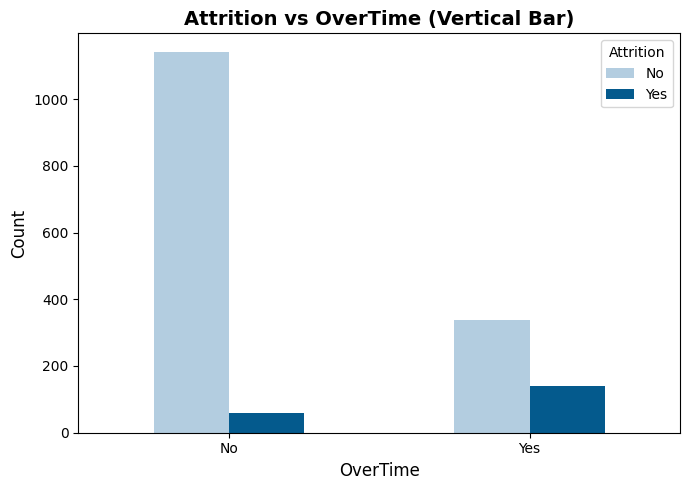

In [3]:
colors_map = {'Yes': '#045a8d', 'No': '#b3cde0'}
fig, ax = plt.subplots(figsize=(7, 5))
overtime_counts.plot(kind='bar', ax=ax, color=[colors_map.get(x, '#777777') for x in overtime_counts.index])
ax.set_title('Attrition vs OverTime (Vertical Bar)', fontsize=14, fontweight='bold')
ax.set_xlabel('OverTime', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(title='Attrition')  
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

<Figure size 700x600 with 0 Axes>

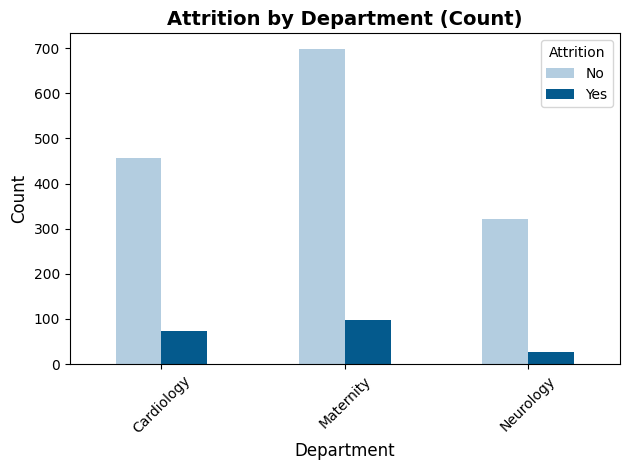

In [4]:
dept_counts = pd.crosstab(df['Department'], df['Attrition'])
colors = ['#b3cde0', '#045a8d']

plt.figure(figsize=(7, 6))
dept_counts.plot(kind='bar', color=colors)
plt.title('Attrition by Department (Count)', fontsize=14, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

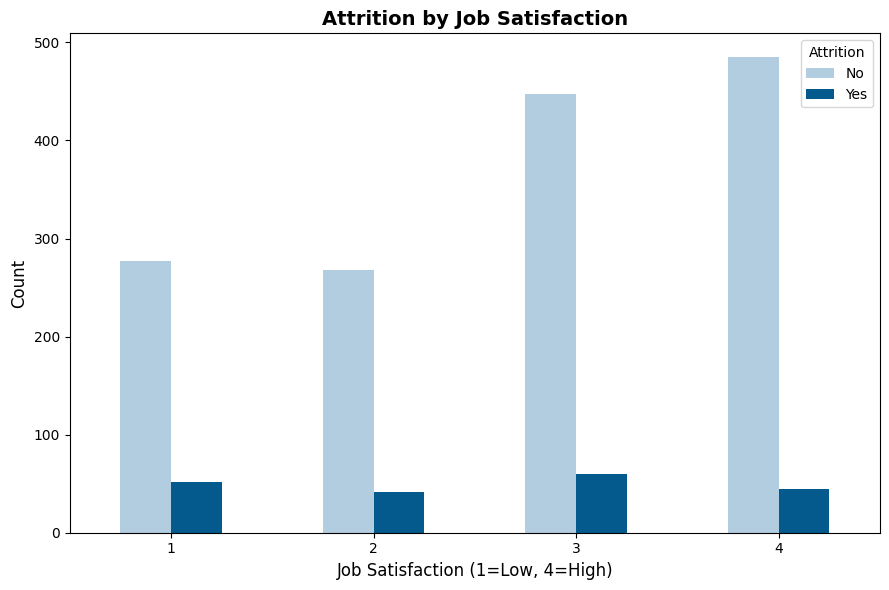

In [5]:
colors_map = {'Yes': '#045a8d', 'No': '#b3cde0'}
fig, ax = plt.subplots(figsize=(9, 6))

jobsat_counts.plot(kind='bar', ax=ax, color=[colors_map.get(x, '#777777') for x in jobsat_counts.columns])

ax.set_title('Attrition by Job Satisfaction', fontsize=14, fontweight='bold')
ax.set_xlabel('Job Satisfaction (1=Low, 4=High)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(title='Attrition', labels=['No', 'Yes'])
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

C:\Users\madha\AppData\Local\Temp\ipykernel_3400\403871229.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=['No', 'Yes'], patch_artist=True, widths=0.5)


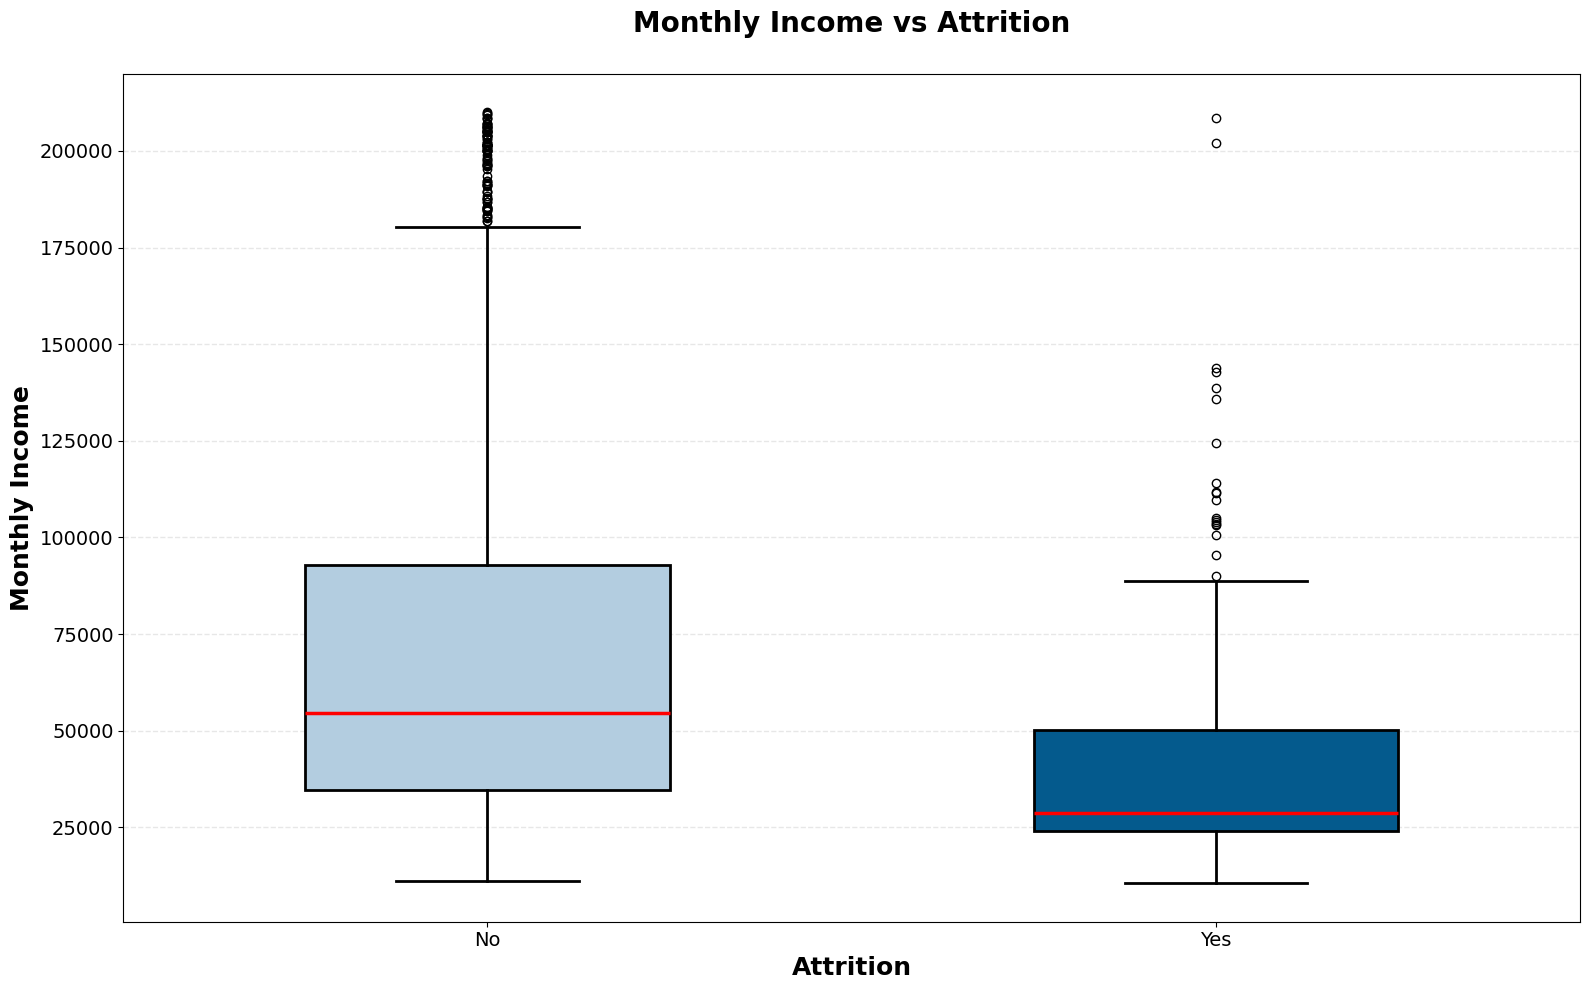

In [6]:
fig, ax = plt.subplots(figsize=(16, 10))
box_data = [df[df['Attrition'] == 'No']['MonthlyIncome'], 
            df[df['Attrition'] == 'Yes']['MonthlyIncome']]

bp = ax.boxplot(box_data, labels=['No', 'Yes'], patch_artist=True, widths=0.5)

colors = ['#b3cde0', '#045a8d']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_linewidth(2)

for whisker in bp['whiskers']:
    whisker.set_linewidth(2)
for cap in bp['caps']:
    cap.set_linewidth(2)
for median in bp['medians']:
    median.set_linewidth(2.5)
    median.set_color('red')

ax.set_title('Monthly Income vs Attrition', fontsize=20, fontweight='bold', pad=30)
ax.set_xlabel('Attrition', fontsize=18, fontweight='bold')
ax.set_ylabel('Monthly Income', fontsize=18, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1)
ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

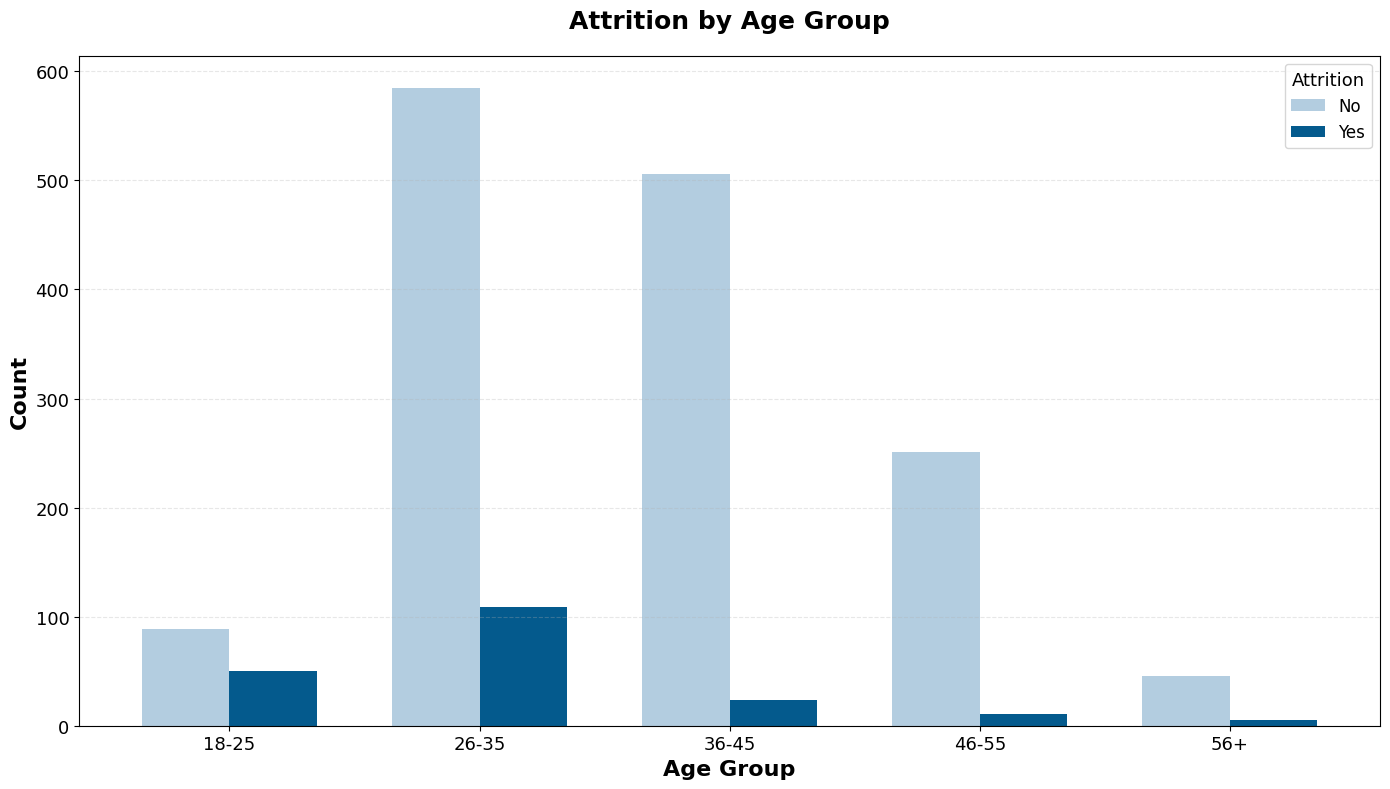

In [7]:

fig, ax = plt.subplots(figsize=(14, 8))

age_attrition.plot(kind='bar', ax=ax, color=['#b3cde0', '#045a8d'], width=0.7)

ax.set_title('Attrition by Age Group', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Age Group', fontsize=16, fontweight='bold')
ax.set_ylabel('Count', fontsize=16, fontweight='bold')
ax.legend(title='Attrition', labels=['No', 'Yes'], fontsize=12, title_fontsize=13)
ax.tick_params(axis='both', labelsize=13)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()